In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import random
from model.pgm import *
import time

In [2]:
datafile = open('./data/lognormal.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)
gaps = np.diff(data)

100%|██████████| 18500001/18500001 [00:13<00:00, 1383568.88it/s]


In [3]:
epsilon_list = list(range(25,400,25))
Pgm_Index_seg_num = []
Pgm_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    Pgm_Index = Pgm(epsilon)
    Pgm_Index.learn_index(data)
    Pgm_Index_seg_num.append(Pgm_Index.seg_num)
    Pgm_Index_mae.append(Pgm_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 0/18500001 [00:00<?, ?it/s]

25 3481 11.819864225953285


100%|██████████| 18500001/18500001 [02:20<00:00, 131276.57it/s]


50 900 23.428557976834703


  0%|          | 6210/18500001 [00:00<04:57, 62098.87it/s]

75 411 35.82510303648092


  0%|          | 5723/18500001 [00:00<05:23, 57224.32it/s]

100 240 47.34781598119913


  0%|          | 3063/18500001 [00:00<10:04, 30619.08it/s]

125 145 58.852112007993945


  0%|          | 3040/18500001 [00:00<10:08, 30394.09it/s]

150 115 70.36556652078019


100%|██████████| 18500001/18500001 [02:22<00:00, 130185.19it/s]


175 90 80.34824344063549


  0%|          | 2989/18500001 [00:00<10:18, 29885.47it/s]

200 75 90.17721442285327


  0%|          | 2977/18500001 [00:00<10:21, 29769.96it/s]

225 64 99.91097351832576


  0%|          | 3051/18500001 [00:00<10:06, 30499.85it/s]

250 59 112.03026518755323


100%|██████████| 18500001/18500001 [02:28<00:00, 124794.43it/s]


275 56 125.13833193846854


  0%|          | 2986/18500001 [00:00<10:19, 29850.92it/s]

300 50 136.03773561958187


  0%|          | 4799/18500001 [00:00<06:25, 47976.21it/s]

325 49 147.94418367869278


  0%|          | 2961/18500001 [00:00<10:24, 29607.56it/s]

350 43 156.7073590968995


100%|██████████| 18500001/18500001 [02:35<00:00, 118933.38it/s]


375 42 167.42922532814998


-145.9925428936879

In [4]:
#epsilon_list = list(range(25,400,25))
Pgm_Dynamic_Index_seg_num = []
Pgm_Dynamic_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    Pgm_Dynamic_Index = PgmDynamic(epsilon_list[i],init_epsilon=range(25,400,25))
    Pgm_Dynamic_Index.learn_index_lookahead(data)
    Pgm_Dynamic_Index_seg_num.append(Pgm_Dynamic_Index.seg_num)
    Pgm_Dynamic_Index_mae.append(Pgm_Dynamic_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 18500001/18500001 [02:26<00:00, 126611.60it/s]


25 2833 11.276920201247556


100%|██████████| 18500001/18500001 [02:21<00:00, 131041.86it/s]


50 710 22.872543736619257


100%|██████████| 18500001/18500001 [02:20<00:00, 131893.45it/s]


75 316 33.84152049505295


100%|██████████| 18500001/18500001 [02:19<00:00, 132363.77it/s]


100 176 46.268316039550484


100%|██████████| 18500001/18500001 [02:19<00:00, 132944.11it/s]


125 125 58.61420466950245


100%|██████████| 18500001/18500001 [02:19<00:00, 132878.97it/s]


150 85 70.92876897682329


100%|██████████| 18500001/18500001 [02:20<00:00, 131525.65it/s]


175 65 88.52675564720239


100%|██████████| 18500001/18500001 [02:21<00:00, 130702.65it/s]


200 55 99.29967971353082


100%|██████████| 18500001/18500001 [02:22<00:00, 129498.20it/s]


225 50 115.20796085362373


100%|██████████| 18500001/18500001 [02:25<00:00, 127528.70it/s]


250 43 128.7450294191876


100%|██████████| 18500001/18500001 [02:27<00:00, 125312.54it/s]


275 41 139.03150837667522


100%|██████████| 18500001/18500001 [02:29<00:00, 124136.02it/s]


300 41 151.84858817034657


100%|██████████| 18500001/18500001 [02:30<00:00, 122778.41it/s]


325 39 168.47010937999408


100%|██████████| 18500001/18500001 [02:32<00:00, 121558.76it/s]


350 37 182.7826072549942


100%|██████████| 18500001/18500001 [02:34<00:00, 119935.78it/s]


375 37 192.98336032522377


-176.38014188508194

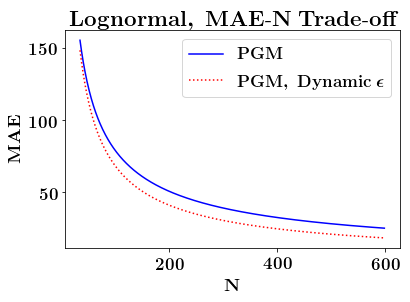

In [7]:
x = np.arange(35,600)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Lognormal,~MAE\mbox{-}N~Trade\mbox{-}off}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,Pgm_Index_seg_num[1:-4],Pgm_Index_mae[1:-4])
p2,_ = curve_fit(func,Pgm_Dynamic_Index_seg_num[1:-4],Pgm_Dynamic_Index_mae[1:-4])
#p3,_ = curve_fit(func,Pgm_Index_seg_num,Pgm_Index_mae)
#p4,_ = curve_fit(func,Pgm_Dynamic_Index_seg_num,Pgm_Dynamic_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{PGM}$')
#plt.scatter(Pgm_Index_seg_num[2:-2], Pgm_Index_mae[2:-2],c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{PGM,~Dynamic~\epsilon}$')
#plt.scatter(Pgm_Dynamic_Index_seg_num[2:-3], Pgm_Dynamic_Index_mae[2:-3],c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/PGM/Lognormal_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [8]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(26667.278542015472, 21829.68585496745, 0.18140556335458757)